In [40]:
%config Completer.use_jedi = False

In [53]:
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [42]:
raw_data = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/ML_Classificacao_por_tras_dos_panos/main/Dados/Customer-Churn.csv')
raw_data.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


In [43]:
data = raw_data.copy()

print(raw_data.shape)
print(data.shape)

(7043, 18)
(7043, 18)


## Pre-process

In [44]:
map_dict = {'Sim': 1, 'Nao': 0}
data = data[data.columns].replace(map_dict)
data

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,1,0,1,0,SemServicoTelefonico,DSL,0,1,0,0,0,0,Mensalmente,1,ChequeDigital,29.85,0
1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,UmAno,0,ChequePapel,56.95,0
2,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Mensalmente,1,ChequePapel,53.85,1
3,0,0,0,45,0,SemServicoTelefonico,DSL,1,0,1,1,0,0,UmAno,0,DebitoEmConta,42.30,0
4,0,0,0,2,1,0,FibraOptica,0,0,0,0,0,0,Mensalmente,1,ChequeDigital,70.70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,DSL,1,0,1,1,1,1,UmAno,1,ChequePapel,84.80,0
7039,0,1,1,72,1,1,FibraOptica,0,1,1,0,1,1,UmAno,1,CartaoDeCredito,103.20,0
7040,0,1,1,11,0,SemServicoTelefonico,DSL,1,0,0,0,0,0,Mensalmente,1,ChequeDigital,29.60,0
7041,1,1,0,4,1,1,FibraOptica,0,0,0,0,0,0,Mensalmente,1,ChequePapel,74.40,1


In [49]:
data = pd.get_dummies(data)
data['target'] = data.Churn
data.drop('Churn', axis=1)
data

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,PagamentoOnline,ContaMensal,Churn,VariasLinhasTelefonicas_0,VariasLinhasTelefonicas_1,...,StreamingDeFilmes_1,StreamingDeFilmes_SemServicoDeInternet,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,target
0,0,1,0,1,0,1,29.85,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,0,0,0,34,1,0,56.95,0,1,0,...,0,0,0,0,1,0,0,1,0,0
2,0,0,0,2,1,1,53.85,1,1,0,...,0,0,0,1,0,0,0,1,0,1
3,0,0,0,45,0,0,42.30,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,2,1,1,70.70,1,1,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,84.80,0,0,1,...,1,0,0,0,1,0,0,1,0,0
7039,0,1,1,72,1,1,103.20,0,0,1,...,1,0,0,0,1,1,0,0,0,0
7040,0,1,1,11,0,1,29.60,0,0,0,...,0,0,0,1,0,0,1,0,0,0
7041,1,1,0,4,1,1,74.40,1,0,1,...,0,0,0,1,0,0,0,1,0,1


<AxesSubplot:xlabel='target', ylabel='count'>

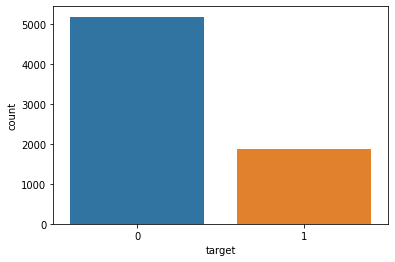

In [51]:
sns.countplot(x='target', data=data)

In [56]:
X = data.drop('target', axis=1)
y = data.target

smt = SMOTE(random_state=123)
X, y = smt.fit_resample(X, y)

In [59]:
new_data = pd.concat([X, y], axis=1)
new_data

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,PagamentoOnline,ContaMensal,Churn,VariasLinhasTelefonicas_0,VariasLinhasTelefonicas_1,...,StreamingDeFilmes_1,StreamingDeFilmes_SemServicoDeInternet,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,target
0,0,1,0,1,0,1,29.850000,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,0,0,0,34,1,0,56.950000,0,1,0,...,0,0,0,0,1,0,0,1,0,0
2,0,0,0,2,1,1,53.850000,1,1,0,...,0,0,0,1,0,0,0,1,0,1
3,0,0,0,45,0,0,42.300000,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,2,1,1,70.700000,1,1,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,0,1,0,5,1,1,80.921075,1,0,1,...,0,0,0,1,0,0,1,0,0,1
10344,0,0,0,3,1,1,74.347278,1,0,1,...,0,0,0,1,0,1,0,0,0,1
10345,0,0,0,18,1,1,70.164647,1,1,0,...,0,0,0,1,0,0,1,0,0,1
10346,0,0,0,30,1,0,93.024726,1,0,1,...,0,0,0,1,0,1,0,0,0,1


<AxesSubplot:xlabel='target', ylabel='count'>

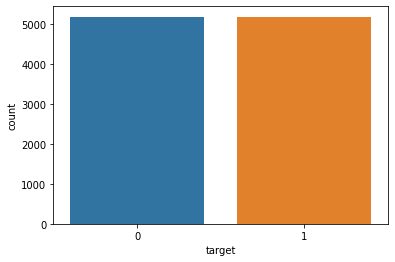

In [61]:
sns.countplot(x='target', data=new_data)